Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below: 

Ananya Gandhi, no collaborators

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# HW 4:  Interpolation

## Question 1

[10] The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$w(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} 
a & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).  Note that you may have multiple non-zero coefficients $a$.  Make sure to cover all these cases and list the conditions that you will find these values.

YOUR ANSWER HERE

Using the transformation $x = \cos \theta$, we have:

$$ 
    x = \cos \theta \\
    dx = -\sin \theta d\theta 
$$

Applying this transformation to $w(x)$, we have

$$
    w(x) = \frac{1}{\sqrt{1 - x^2}} = \frac{1}{\sqrt{1 - \cos^2 \theta}} \\
    w(x) = \frac{1}{\sqrt{\sin^2 \theta}} = \frac{1}{\sin \theta} 
$$

Now applying these transformations to the integral

$$ 
    \int_{-1}^{1} w(x) T_n(x) T_m(x) dx 
$$

And transforming the bounds of the integral

$$
    x = \cos \theta = -1 \\
    \theta = \pi
$$

$$
    x = \cos \theta = 1 \\
    \theta = 0
$$

We end up with

$$ 
    \int_{\pi}^{0} \frac{1}{\sin \theta} T_n(\cos \theta) T_m(\cos \theta) (-\sin \theta) d\theta \\
    -\int_{\pi}^{0} T_n(\cos \theta) T_m(\cos \theta) d\theta \\
    \int_{0}^{\pi} T_n(\cos \theta) T_m(\cos \theta) d\theta
$$

Applying the Chebyshev Polynomial Identity, we 

$$ 
    \int_{0}^{\pi} (\cos n\theta)(\cos m\theta) d\theta
$$

which is only non-zero when $n = m$

Applying $m = n$, we get
$$ 
    \int_{0}^{\pi} (\cos^2 n\theta) d\theta = \frac{\theta}{2} + \frac{\sin 2\theta}{4} \Big|_0^\pi = \frac{\pi}{2}
$$

For any $n, m$, the integral evaluates to

$$ \int_{0}^{\pi} (\cos n\theta)(\cos m\theta) d\theta = \left \{ \begin{aligned} 
\frac{\pi}{2} & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

Lastly, consider the case when $n = m = 0$
$$
    \int_{0}^{\pi} (\cos^2 0) d\theta = \theta \Big|_0^\pi = \pi
$$

So our final result is
$$ \int_{0}^{\pi} (\cos n\theta)(\cos m\theta) d\theta = \left \{ \begin{aligned} \pi & ~ & m = n = 0\\ 
\frac{\pi}{2} & ~ & m = n \neq 0 \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

So we end up with $a = \frac{\pi}{2}$ for $m = n \neq 0$ 

and $a = \pi$ for $m = n = 0$

## Question 2

We discussed in class that equally spaced points are not optimal and in fact the Lagrange interpolants can vary considerably from 1 near the ends.  For these questions consider the interval $x\in[-1, 1]$.

**(a)** [10] For $N = 4$ find the position and value of the maximum value on $[-1,1]$ of $|\ell_k(x)|$ analytically for $\ell_2(x)$ using equi-spaced points (extra credit for finding them for all analytically).

YOUR ANSWER HERE

We can find the maximum value of $l_2(x)$ on the interval $[-1,1]$:

$$
    l_2(x) = \prod_{j = 0, j \neq i} ^ {4} \frac{x - x_j}{x_i - x_j} \\
    l_2(x) = (\frac{x - x_0}{x_2 - x_0})(\frac{x - x_1}{x_2 - x_1})(\frac{x - x_3}{x_2 - x_3})(\frac{x - x_4}{x_2 - x_4}) 
$$


Evaluate on the interval $[-1, 1]$

Let $x_0 = -1, x_1 = -0.5, x_2 = 0, x_3 = 0.5, x_4 = 1$. 

$$
    l_2(x) = (\frac{x + 1}{1})(\frac{x + 0.5}{0.5})(\frac{x - 0.5}{-0.5})(\frac{x - 1}{-1}) \\
    l_2(x) = \frac{(x + 1)(x + 0.5)(x - 0.5)(x - 1)}{0.25} \\
    l_2(x) = 4(x^2 - 1)(x^2 - 0.25) \\
    l_2(x) = 4x^4 - 5x^2 + 1
$$

Analytically find maximum of $l_2(x)$ by finding the derivative and setting to zero

$$
    l_2^{'}(x) = 16x^3 - 10x = 0 \\
    x(16x^2 - 10) = 0 \\
    x = 0, x = \pm \frac{\sqrt{10}}{4}
$$

Find second derivative to determine maxima:
$$
    l_2^{''}(x) = 48x^2 - 10 \\
    l_2^{''}(0) = -10 \\
    l_2^{''}(\frac{\sqrt{10}}{4}) = 20 \\
    l_2^{''}(\frac{-\sqrt{10}}{4}) = 20 
$$

Because the second derivative of $l_2 (x)$ is negative at $x = 0$, this is a local maximum. The value of $l_2 (x)$ is

$$
    l_2(0) = 1
$$

EXTRA CREDIT



**(b)** [10] Estimate $\max |\ell_k(x)|$ for $N > 2$ by writing a function that returns the maximum absolute value of all Lagrange basis functions for $N$ evenly spaced points.  Note that $N$ is the polynomial order, not the number of points.  Use
```python
x = numpy.linspace(-1, 1, 100)
```
to evaluate the polynomial.  Also it may be helpful to plot the basis and the maximum found to check your answer:
```python
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, lagrange_basis)
axes.plot(x_max, lagrange_basis_max, 'ko')
```

In [2]:
def max_equal_basis(N):
    """Compute the maximum amplitude of the Lagrange
    polynomial basis of degree *N*

    """
    x = numpy.linspace(-1, 1, 100)
    
    # YOUR CODE HERE

    maxes = []
    
    xij = numpy.linspace(-1, 1, N + 1)


    for xi in xij:

      li = numpy.ones(x.shape)
      
      for xj in xij:

        if xj != xi:
          li *= (x - xj) / (xi - xj)
      
      maxes.append(max(numpy.abs(li)))
    
    return max(maxes)

    #raise NotImplementedError()

In [3]:
N = [2, 4, 6, 8, 10, 12, 20, 30, 40]
max_value = numpy.empty(len(N))
for (i, n) in enumerate(N):
    max_value[i] = max_equal_basis(n)
numpy.testing.assert_allclose(max_value, [1.00000000e+00, 1.15204532e+00, 1.36216139e+00, 
                                          2.54889859e+00, 6.50684027e+00, 1.80407350e+01, 
                                          1.79785431e+03, 8.77912809e+05, 4.27506380e+08])

print("Success!")

Success!


**(c)** [5] Repeat part **b** but with Chebyshev points.  Note that these are Lagrangian basis functions using Chebyshev points (or nodes) rather than the Chebyshev polynomial basis.  Again use the plotting code above if you need to debug.

In [4]:
def max_chebyshev_basis(N):
    """Using Chebyshev nodes and the corresponding Lagrangian basis
    compute the maximum amplitude of the basis function of degree *N*.
    """
    x = numpy.linspace(-1, 1, 100)
    # YOUR CODE HERE
    
    maxes = []

    k = numpy.array([i for i in range(1, N + 2)])
    xk = numpy.cos((2*k - 1)*numpy.pi/(2*N + 2))

    for xi in xk:

      li = numpy.ones(x.shape)
      
      for xj in xk:

        if xj != xi:
          li *= (x - xj) / (xi - xj)
      
      maxes.append(max(numpy.abs(li)))
    
    return max(maxes)
    
    #raise NotImplementedError()

In [5]:
N = [2, 4, 6, 8, 10, 12, 20, 30, 40]
max_value = numpy.empty(len(N))
for (i, n) in enumerate(N):
    max_value[i] = max_chebyshev_basis(n)

numpy.testing.assert_allclose(max_value, [1.24401694, 1.2627503, 1.26789221, 1.27000581, 
                                          1.27107518, 1.27169006, 1.27264584, 1.27296711,
                                          1.2730838])

print("Success!")

Success!


**(d)** [5] Plot a comparison of the results (on the same plot) from part **b** and **c** using the same values of N.  Make sure to use a `semilogy` plot so that the values are vieable (at least for one of the series).

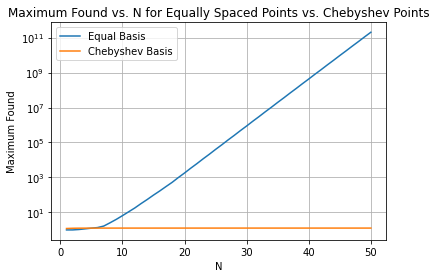

In [6]:
# YOUR CODE HERE

N = numpy.array([i for i in range(1, 51)])
equal = numpy.array([max_equal_basis(num) for num in N])
cheby = numpy.array([max_chebyshev_basis(num) for num in N])

plt.semilogy(N, equal, label="Equal Basis")
plt.semilogy(N, cheby, label="Chebyshev Basis")
plt.legend()
plt.grid()
plt.ylabel("Maximum Found")
plt.xlabel("N")
plt.title("Maximum Found vs. N for Equally Spaced Points vs. Chebyshev Points")
plt.show()

# raise NotImplementedError()

## Question 3

Consider the Lebesgue function
$$
\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x)\big{|}
$$
where $\ell_i(x)$ are Lagrange basis functions for a given set of $x_i$.  The maximum of the Lebesgue function is called $\Lambda_n$ the Lebesgue constant and have a clear connection to Lagrangian interpolation as they provide a first estimate for the interpolation error.  Unfortunately, $\Lambda_N$ is not uniformly bounded regardless of the nodes used as one can show that 
$$
    \Lambda_N > \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty
$$

Note, $\Lambda_n$ is the infinite-norm of the linear operator mapping data to interpolant on the given grid and interval.

**(a)** [5] What do you expect the Lebesgue function to look like?  Are there key points where we will know the function value exactly?

YOUR ANSWER HERE

The Lebesgue function is the sum of multiple Lagrange basis functions, which all have wave-like behavior when plotted. The Lebesgue function would thus look like the superposition of several waves, and have a similar wave-like structure. 

For certain values of x, like $x = x_i$, we will know the value of the function exactly.

We can rewrite the summation as:

$$
    \lambda_N (x) = \sum_{i = 0}^{N} |l_i(x)| = |l_0(x)| + |l_1(x)| + |l_2(x)| + ... + |l_N(x)|
$$

Each Lagrange basis function is defined as:

$$
    l_i(x) = \prod_{j = 0, j \neq i} ^ {N} \frac{x - x_j}{x_i - x_j}
$$

So, if we substitute $x = x_i$ to get $l_i(x_i)$, then we have:

$$
    l_i(x_i) = \prod_{j = 0, j \neq i} ^ {N} \frac{x_i - x_j}{x_i - x_j} \\
    l_i(x_i) = \prod_{j = 0, j \neq i} ^ {N} 1 \\
    l_i(x_i) = 1
$$

The other Lagrange basis terms $l_k(x_i)$, where $k \neq i$, have the form
$$
    l_k(x) = \prod_{j = 0, j \neq i} ^ {N} \frac{x - x_j}{x_k - x_j} = (\frac{x - x_0}{x_k - x_0}) \times (\frac{x - x_1}{x_k - x_1}) \times  ... \times (\frac{x - x_i}{x_k - x_i}) \times ... \times (\frac{x - x_N}{x_k - x_N})
$$

When we plug in $x = x_i$ into the other terms $l_k(x)$, we get:
$$
    l_k(x_i) = (\frac{x_i - x_0}{x_k - x_0}) \times (\frac{x_i - x_1}{x_k - x_1}) \times  ... \times (\frac{x_i - x_i}{x_k - x_i}) \times ... \times (\frac{x_i - x_N}{x_k - x_N}) \\
    l_k(x_i) = (\frac{x_i - x_0}{x_k - x_0}) \times (\frac{x_i - x_1}{x_k - x_1}) \times  ... \times 0 \times ... \times (\frac{x_i - x_N}{x_k - x_N}) \\
    l_k(x_i) = 0
$$

Thus, we end up with $l_k(x_i) = 0$ for all Lagrange basis terms where $i \neq k$

For the overall Lebesgue function, whenever we have $x = x_i$ for some $i$, our Lebesgue function becomes:
$$
    \lambda_N (x) = \sum_{i = 0}^{N} |l_i(x)| = |l_0(x)| + |l_1(x)| +  ... + |l_i(x)| + ... + |l_N(x)| \\
    \lambda_N (x) = 0 +  0 +  ... + 1 + ... +  0 \\
    \lambda_N (x) = 1
$$

So at these points $x = x_i$, we are certain about the value of the Lebesgue function.

**(b)** [10] Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = -1 + \frac{2 i}{N}, ~~~ i = 0, 1, \ldots, N.
$$
For the case where $N = 20$ comment on what you see (you may need to use `semilogy` to see the results).

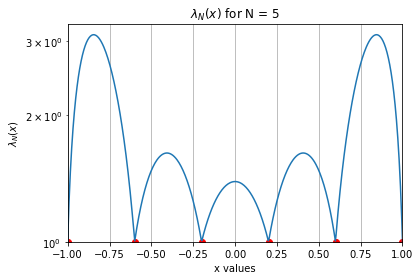

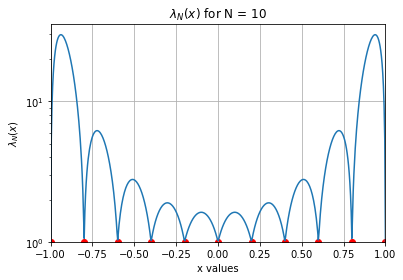

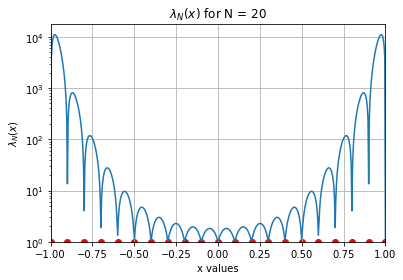

In [7]:
# YOUR CODE HERE
def lebesgue1(x, N):
  
  xij = numpy.array([-1 + (2*i)/N for i in range(0, N + 1)])

  lambdaN = numpy.zeros(x.shape)
  
  for xi in xij:
    
    li = numpy.ones(x.shape)

    for xj in xij:

      if xj != xi:
        li *= (x - xj) / (xi - xj)
    
    lambdaN += numpy.abs(li)

  return lambdaN


for N in [5, 10, 20]:
  #N = 20
  x = numpy.linspace(-1, 1, 500)

  lambdaN = lebesgue1(x, N)
  plt.semilogy(x, lambdaN)

  xij = numpy.array([-1 + (2*i)/N for i in range(0, N + 1)])
  plt.scatter(xij, [1]*len(xij), color="red")
  
  plt.xlabel("x values")
  plt.ylabel("$\lambda_N(x)$")
  plt.title("$\lambda_N(x)$ for N = " + str(N))

  plt.xlim(-1, 1)
  plt.ylim(bottom=1)

  plt.grid()
  plt.show()

# raise NotImplementedError()

YOUR ANSWER HERE

In part a, we calculated that $\lambda_N(x) = 1$ for the points $x_i$ that we are certain about. When N is smaller, like for N = 5, we still observe that $\lambda_N(x_i) = 1$ as our $x_i$ values (shown in red) are close to the plot of $\lambda_N(x)$. However, as N increases, we no longer see this pattern. The error between the plot of $\lambda_N$ and the points where $\lambda_N = 1$ grows. For N = 20, especially at the sides of the plot, we see that the error between $\lambda_N(x_i)$ and $\lambda_N(x_i) = 1$ is really large. 

**(c)** [5] Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = \cos\left( \frac{(2i - 1) \pi}{2 N} \right ) ~~~ i = 1, \ldots, N.
$$
Again comment on what you see in the case $N = 20$.

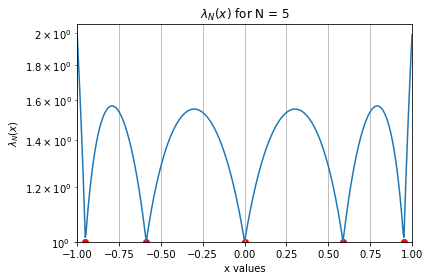

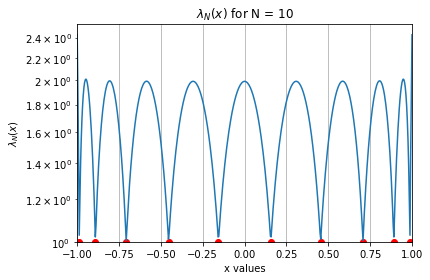

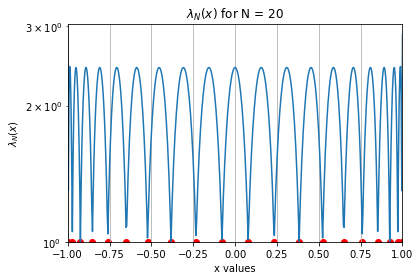

In [8]:
# YOUR CODE HERE
def lebesgue2(x, N):
  
  xij = numpy.array([numpy.cos((2*i - 1)*numpy.pi/(2*N)) for i in range(1, N + 1)])
  lambdaN = numpy.zeros(x.shape)
  
  for xi in xij:
    
    li = numpy.ones(x.shape)

    for xj in xij:

      if xj != xi:
        li *= (x - xj) / (xi - xj)
    
    lambdaN += numpy.abs(li)

  return lambdaN


for N in [5, 10, 20]:
  #N = 20
  x = numpy.linspace(-1, 1, 500)

  lambdaN = lebesgue2(x, N)
  plt.semilogy(x, lambdaN)

  xij = numpy.array([numpy.cos((2*i - 1)*numpy.pi/(2*N)) for i in range(1, N + 1)])
  plt.scatter(xij, [1]*len(xij), color="red")

  plt.xlabel("x values")
  plt.ylabel("$\lambda_N(x)$")
  plt.title("$\lambda_N(x)$ for N = " + str(N))

  plt.xlim(-1, 1)
  plt.ylim(bottom=1)

  plt.grid()
  plt.show()

# raise NotImplementedError()

In the case where N = 20, we see that the interpolation is much more accurate for the Lebesgue Function.
By using Chebyshev points for the interpolation, our values for lambda N are closer to what we expected,
which was that lambda N = 1 for x_i points.

**(d)** [5] What do you observe about the Lebesgue function for each of the distribution of points?

YOUR ANSWER HERE

In these cases, we see that when Chebyshev points, $x_i = \cos(\frac{(2i - 1)\pi}{2N})$ are used instead of the equidistant points, our Lebesgue Function $\lambda_N(x_i)$ is much more accurate in its estimation. The Chebyshev points minimize interpolation error. At the points $x_i$, shown in red, where $\lambda_N(x_i) = 1$ should be true, there is much less error. The Lebesgue Function is more uniform in appearance, with an approximately constant amplitude for each wave, compared to the equidistant case in which the amplitude varied greatly.

**(e)** [5] Using suitable values for $N$ plot the Lebesgue constants of each of the above cases.  Make sure to use a suitably large number of points to evaluate the function.  Graphically demonstrate that the constant grow with the predicted growth rate $\mathcal{O}(\log N)$ keeping in mind that there may be a constant out in front of the $\log N$ term.  Describe what you observe.

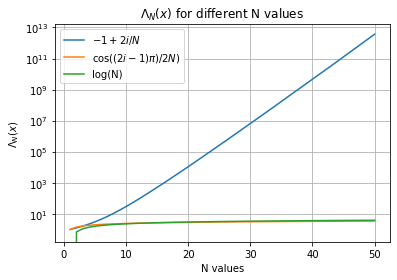

In [9]:
# YOUR CODE HERE

N = [i for i in range(1, 51)]
lebesgue_constant1 = [max(lebesgue1(x, num)) for num in N]
lebesgue_constant2 = [max(lebesgue2(x, num)) for num in N]

plt.semilogy(N, lebesgue_constant1, label="$-1 + 2i/N$")
plt.semilogy(N, lebesgue_constant2, label="$\cos((2i - 1)\pi)/2N)$")
plt.semilogy(N, numpy.log(N), label="log(N)")
plt.xlabel("N values")
plt.ylabel("$\Lambda_N(x)$")
plt.title("$\Lambda_N(x)$ for different N values")
plt.legend()
plt.grid()
plt.show()

# raise NotImplementedError()

YOUR ANSWER HERE

We can see in this plot that the choice of points used to calculate the Lebesgue Constant has a huge impact on the value determined. When $x_i = \cos(\frac{(2i - 1)\pi}{2N})$ is used, the Lebesgue Constant values grows N at the predicted $O(\log N)$ growth rate. When the equidistant points are used, the Lebesgue Constant no longer grows with the predicted growth rate, and instead grows much faster with increasing N.  

## Question 4

In lecture we constructed the system of equations we need to solve for each interval if we wanted to use a piece-wise cubic function and have an interpolant that is $C^1$.  This questions addresses the details of that derivation.

**(a)** [5] Let $x \in [x_k, x_{k+1}] = X$ and $s \in [0, 1] = S$.  Write down the transformation we need to map the $X$ and $S$ to each other, i.e. $T:X \rightarrow S$, along with its inverse $T^{-1}$.

YOUR ANSWER HERE

For some $x \in [x_k, x_{k+1}]$, we want a continuous mapping of this $x$ value to some $s$ where $s \in [0, 1]$. 

If we map the distance from $x_k$ to $x_{k+1}$ to a distance of $1$, we can think of any $x \in [x_k, x_{k+1}]$ and map it to the fraction of this distance that it has covered.

With this logic, we get the transformation:
$$
    s = T(x) = \frac{x - x_k}{x_{k+1} - x_k}
$$

Thus, when we substitute $x = x_k$, we get $T(x_k) = 0$ (which is the desired result) and $T(x_{k+1}) = 1$ (which is also the desired result. This completes our mapping from $X \rightarrow S$. 

We can also compute the inverse:
$$
    x = T^{-1}(s) = s(x_{k+1} - x_k) + x_k
$$

Which maps S back to X.

**(b)** [15] After making the transformation of the equations we found that the system of equations that result are
$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 \\
    0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$
Show that the solution is
$$
    \mathcal{P}(s) = (1-s)^2 (1 + 2s) y_k + s^2 (3 - 2 s) y_{k+1} + s (1 - s)^2 d_k - s^2 (1 - s)d_{k+1}
$$

YOUR ANSWER HERE

We can define the cubic function of s as:

$$
    P(s) = p_0 + p_1 s + p_2 s^2 + p_3 s^3
$$

We want to find the coefficients of this function, $p_0, p_1, p_2, p_3$. 

Currently, we have the system 

$$A \vec{p} = \vec{y}$$

To solve for $\vec{p}$ we can multiply both sides by the matrix inverse $A^{-1}$ 

$$
    A^{-1} A \vec{p} = A^{-1} \vec{y} \\
    \vec{p} = A^{-1} \vec{y} 
$$

We define matrix A as:
$$
    A = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 \\
    0 & 1 & 2 & 3
\end{bmatrix}
$$

The inverse matrix $A^{-1}$ is:
$$
    A^{-1} = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    -3 & 3 & -2 & -1 \\
    2 & -2 & 1 & 1
\end{bmatrix}
$$

So we get that:
$$
    \vec{p} = A^{-1} \vec{y} \\
    \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    -3 & 3 & -2 & -1 \\
    2 & -2 & 1 & 1
\end{bmatrix} \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}
$$

We can solve for the coefficients:
$$
    p_0 = y_k \\
    p_1 = d_k \\
    p_2 = -3y_k + 3y_{k + 1} - 2d_k - d_{k + 1} \\
    p_3 = 2y_k - 2y_{k + 1} + d_k + d_{k + 1} \\
$$

And substitute into $P_k(s)$:
$$
    P_k(s) = y_k = d_k s + (-3y_k + 3y_{k + 1} - 2d_k - d_{k + 1})s^2 + (2y_k - 2y_{k + 1} + d_k + d_{k + 1})s^3 \\
    P_k(s) = y_k - 3y_k s^2 + 2y_k s^3 + 3y_{k + 1}s^2 - 2y_{k + 1}s^3 + d_k s - 2d_k s^2 + d_k s^3 - d_{k + 1}s^2 + d_{k + 1}s^3 \\
    P_k(s) = (1 - 3s^2 + 2s^3)y_k + (3s^2 - 2s^3)y_{k + 1} + (s - 2s^2 + s^3)d_k + (-s^2 + s^3)d_{k + 1}
$$

If we factor the $s$ terms, we get:
$$
    P_k(s) = (1-s)^2(1 + 2s)y_k + s^2(3 - 2s)y_{k + 1} + s(1-s)^2d_k + -s^2(1 - s)d_{k + 1}
$$

Which matches the desired solution.


In [10]:
# YOUR CODE HERE
# raise NotImplementedError()

**(c)** [10] Use $T^{-1}$ to transform back to $X$ and write down the polynomial in terms of the original variable $x$.

YOUR ANSWER HERE

From earlier, we have:
$$
    s = T(x) = \frac{x - x_k}{x_{k+1} - x_k} \\
    x = T^{-1}(s) = s(x_{k+1} - x_k) + x_k
$$

Using $x = T^{-1}(s)$ and applying it to $P_k(s)$, we have:

$$
    P_k(x) = P_k(T^{-1}(s)) = P_k(s(x_{k+1} - x_k) + x_k) \\
    P_k(x) = (1-(s(x_{k+1} - x_k) + x_k))^2(1 + 2(s(x_{k+1} - x_k) + x_k))y_k + (s(x_{k+1} - x_k) + x_k)^2(3 - 2(s(x_{k+1} - x_k) + x_k))y_{k + 1} + (s(x_{k+1} - x_k) + x_k)(1-(s(x_{k+1} - x_k) + x_k))^2d_k - (s(x_{k+1} - x_k) + x_k)^2(1 - (s(x_{k+1} - x_k) + x_k))d_{k + 1} \\
$$

Then, applying $s = T(x) = \frac{x - x_k}{x_{k+1} - x_k}$, we get
$$
    P_k(x) = (1-((x - x_k) + x_k))^2(1 + 2((x - x_k) + x_k))y_k + ((x - x_k) + x_k)^2(3 - 2((x - x_k) + x_k))y_{k + 1} + ((x - x_k) + x_k)(1-((x - x_k) + x_k))^2d_k - ((x - x_k) + x_k)^2(1 - ((x - x_k) + x_k))d_{k + 1} \\
$$

Which simplifies to the final answer:
$$
    P_k(x) = (1-x)^2(1 + 2x)y_k + x^2(3 - 2x)y_{k + 1} + x(1-x)^2d_k - x^2(1 - x)d_{k + 1} \\
$$